In [1]:
import numpy as np
import matplotlib.pylab as plt
import ot
from utils import simulate_dataset, format_dataset
from repairs import DI_list_geometric_repair, DI_list_random_repair
from sklearn.manifold import TSNE

In [2]:
# Parameters for the simulation
n0 = 600
n1 = 400
mu0 = (3, 3, 2, 2.5, 3.5)
mu1 = (4, 4, 3, 3.5, 4.5)
sigma = np.diag([1, 1, 0.5, 0.5, 1])
beta0 = (1, -1, -0.5, 1, -1)
beta1 = (1, -0.4, 1, -1, 1)

# Simulate the dataset
X0, X1, Y0, Y1 = simulate_dataset(n0, n1, mu0, mu1, sigma, beta0, beta1)
X0.shape, X1.shape, Y0.shape, Y1.shape

((600, 5), (400, 5), (600,), (400,))

We visualize each distributions projecting each of the 5d multivariate source conditional datasets to 2d representation, using the TSNE algorithm

In [3]:
X,Y = format_dataset(X0, X1, Y0, Y1)

X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X[:,1:])
X_embedded = np.concatenate([X[:,:1], X_embedded], axis=1)
X_embedded.shape

(1000, 3)

(1000, 6) (1000,)


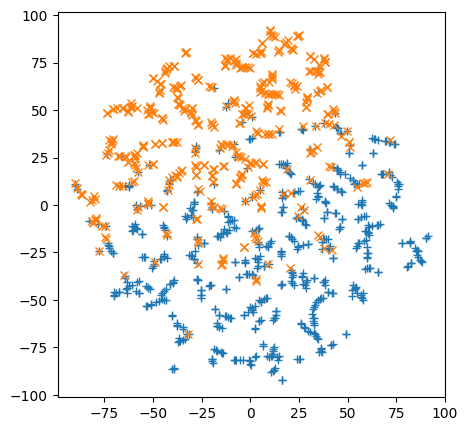

In [4]:
X,Y = format_dataset(X0, X1, Y0, Y1)
print(X.shape, Y.shape)
plt.figure(1, (5, 5))
plt.plot(X_embedded[X_embedded[:,0] == 0][:, 1], X_embedded[X_embedded[:,0] == 0][:, 2], '+')
plt.plot(X_embedded[X_embedded[:,0] == 1][:, 1], X_embedded[X_embedded[:,0] == 1][:, 2], 'x')
plt.show()

The linear optimal transport map between the two conditional distributions can be numerically approached as follows :

In [5]:
Ae, be = ot.da.OT_mapping_linear(X0, X1)

lbd = 0.5

X01 = X0.dot(Ae) + be
X01 = lbd*X01+(1-lbd)*X0
X01.shape

(600, 5)

It gives us a way of computing different weighted Wasserstein barycenters.

## Geometric repair

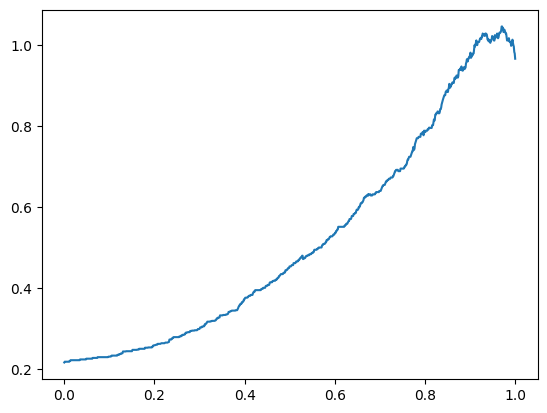

In [6]:
res=DI_list_geometric_repair(X0,X1)
plt.plot(np.linspace(0,1,len(res)), res)

## Random repair

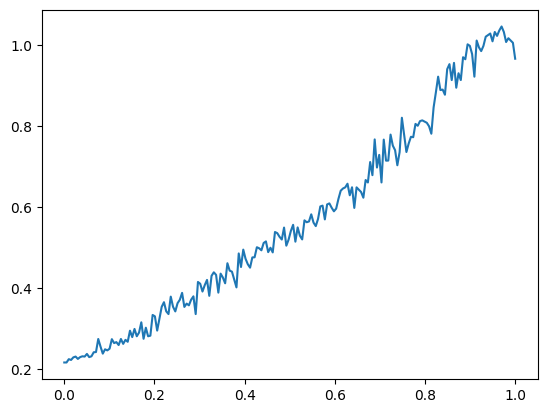

In [7]:
res2=DI_list_random_repair(X0,X1)
plt.plot(np.linspace(0,1,len(res2)), res2, )